In [264]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx

from shapely.geometry import LineString

In [265]:
SOURCE_EPSG = 4326
WGS84_EPSG  = 3857
SWEREF_EPSG =  3006

hdfs_files = ['2017-01-14','2017-02-09','2017-02-25','2017-03-29','2017-03-30','2017-04-05',
              '2017-04-06','2017-04-07','2017-04-08','2017-04-22','2017-04-23','2017-04-27','2017-04-28','2017-04-29','2017-04-30','2017-05-06','2017-05-12','2017-05-24','2017-05-25','2017-05-27','2017-06-05','2017-06-10','2017-06-14','2017-06-15','2017-06-17','2017-07-13','2017-07-14','2017-08-03','2017-08-04','2017-08-09','2017-08-10','2017-08-11','2017-08-12','2017-08-16','2017-08-17','2017-08-18','2017-09-06','2017-09-07','2017-09-08','2017-09-13','2017-09-14','2017-09-15','2017-09-16','2017-09-17','2017-09-30','2017-10-07','2017-10-12','2017-10-13','2017-10-14','2017-11-01','2017-11-07','2017-11-16','2017-11-17','2017-11-18','2017-11-19','2017-11-20','2017-11-21','2017-11-22','2017-11-23','2017-11-24','2017-11-25','2017-11-29','2017-11-30','2017-12-01','2017-12-07','2017-12-13','2017-12-14','2017-12-19','2017-12-21','2017-12-28','2017-12-29','2017-12-30','2017-12-31','2018-01-01','2018-01-02','2018-01-03','2018-01-04','2018-01-11','2018-01-18','2018-01-25','2018-02-01','2018-02-08','2018-02-11','2018-02-12','2018-02-13','2018-02-14','2018-02-15','2018-02-16','2018-02-17','2018-02-22','2018-02-24','2018-03-01','2018-03-08','2018-03-15','2018-03-22','2018-03-27','2018-03-29','2018-04-05','2018-04-12','2018-04-19','2018-04-26','2018-05-03','2018-05-05','2018-05-08','2018-05-10','2018-05-12','2018-05-16','2018-05-17','2018-05-19','2018-05-20','2018-05-23','2018-05-24','2018-05-31','2018-06-05','2018-06-07','2018-06-14','2018-06-21','2018-06-28','2018-07-05','2018-07-12','2018-07-19','2018-07-26','2018-08-02','2018-08-09','2018-08-16','2018-08-19','2018-08-23','2018-08-30','2018-08-31','2018-09-02','2018-09-06','2018-09-09','2018-09-13','2018-09-20','2018-09-27','2018-10-04','2018-10-11','2018-10-18','2018-10-25','2018-10-26','2018-10-27','2018-11-01','2018-11-08','2018-11-09','2018-11-11','2018-11-15','2018-11-22','2018-11-29','2018-12-06','2018-12-13','2018-12-20','2018-12-27','2019-01-03','2019-01-10','2019-01-17','2019-01-24','2019-01-31','2019-02-04','2019-02-07','2019-02-11','2019-02-14','2019-02-18','2019-02-21','2019-02-25','2019-02-28','2019-03-07','2019-03-14','2019-03-16','2019-03-21','2019-03-23','2019-03-28','2019-03-30','2019-04-01','2019-04-04','2019-04-08','2019-04-11','2019-04-15','2019-04-18','2019-04-25','2019-04-26','2019-04-29','2019-05-02','2019-05-04','2019-05-07','2019-05-08','2019-05-09','2019-05-11','2019-05-16','2019-05-18','2019-05-20','2019-05-23','2019-05-25','2019-05-26','2019-05-30','2019-06-01','2019-06-06','2019-06-08','2019-06-10','2019-06-12','2019-06-13','2019-06-15','2019-06-20','2019-06-22','2019-06-27','2019-06-29','2019-07-04','2019-07-06','2019-07-11','2019-07-13','2019-07-18','2019-07-20','2019-07-25','2019-07-27','2019-08-01','2019-08-08','2019-08-15','2019-08-18','2019-08-22','2019-08-29','2019-09-05','2019-09-12','2019-09-19','2019-09-26','2019-10-03','2019-10-10','2019-10-17','2019-10-24','2019-10-31','2019-11-07','2019-11-14','2019-11-21','2019-11-28','2019-12-05','2019-12-12','2019-12-19','2019-12-26','2020-01-02','2020-01-09','2020-01-16','2020-01-23','2020-01-30','2020-02-03','2020-02-06','2020-02-10','2020-02-13','2020-02-17','2020-02-18','2020-02-19','2020-02-20','2020-02-21','2020-02-22','2020-02-23','2020-02-24','2020-02-27','2020-03-05','2020-03-12','2020-03-14','2020-03-18','2020-03-19','2020-03-21','2020-03-26','2020-03-28','2020-03-30','2020-04-02','2020-04-06','2020-04-09','2020-04-16','2020-04-23','2020-04-30','2020-05-04','2020-05-07','2020-05-09','2020-05-14','2020-05-16','2020-05-21','2020-05-23','2020-05-28','2020-05-30','2020-06-04','2020-06-06','2020-06-11','2020-06-18','2020-06-25','2020-07-02','2020-07-04','2020-07-09','2020-07-11','2020-07-16','2020-07-18','2020-07-23','2020-07-25','2020-07-30','2020-08-01','2020-08-06','2020-08-13','2020-08-20','2020-08-27','2020-09-03','2020-09-10','2020-09-17','2020-09-24','2020-09-25','2020-10-01','2020-10-08','2020-10-15','2020-10-22','2020-10-29','2020-11-05','2020-11-12','2020-11-15','2020-11-19','2020-11-26','2020-12-29','2021-01-14','2021-01-15','2021-01-16','2021-02-02','2021-02-04','2021-03-04','2021-03-11','2021-03-18','2021-03-25','2021-04-01','2021-04-14']

In [266]:
fname = ['data/df_tracks.csv', 'data/df_tracks2.csv']
lst_ = []
for  f in fname:
    t  = pd.read_csv(f)
    lst_.append(t)
    print (t.shape)



df  = pd.concat(lst_, axis=0, ignore_index=True)

(113711, 11)
(48679, 11)


In [267]:
df

,lon,lat,ele,time,j,file,fixdate,nofixdate,nofixyear,fixyear,tofix
0,17.627779,59.864284,24.1,2001-05-15T12:53:45Z,1,2020-12-29_export_2001-05-15 14-53.gpx,2020-12-29 20:37:47,2001-05-15 11:53:45,2001,2020,True
1,17.628180,59.864022,23.7,2001-05-15T12:53:50Z,1,2020-12-29_export_2001-05-15 14-53.gpx,2020-12-29 20:37:52,2001-05-15 11:53:50,2001,2020,True
2,17.628685,59.863695,20.6,2001-05-15T12:53:55Z,1,2020-12-29_export_2001-05-15 14-53.gpx,2020-12-29 20:37:57,2001-05-15 11:53:55,2001,2020,True
3,17.629849,59.862867,11.7,2001-05-15T12:56:54Z,1,2020-12-29_export_2001-05-15 14-53.gpx,2020-12-29 20:40:56,2001-05-15 11:56:54,2001,2020,True
4,17.630467,59.862516,10.1,2001-05-15T12:57:11Z,1,2020-12-29_export_2001-05-15 14-53.gpx,2020-12-29 20:41:13,2001-05-15 11:57:11,2001,2020,True
...,...,...,...,...,...,...,...,...,...,...,...
162385,11.964472,57.711548,8.0,2019-05-19T19:54:16Z,91,Vstra-Frlunda--Gteborg--Skagerrak-Walking-19-M...,2039-01-03 03:38:18,2019-05-19 18:54:16,2019,2039,False
162386,11.964606,57.711616,7.0,2019-05-19T19:54:24Z,91,Vstra-Frlunda--Gteborg--Skagerrak-Walking-19-M...,2039-01-03 03:38:26,2019-05-19 18:54:24,2019,2039,False
162387,11.964783,57.711650,10.0,2019-05-19T19:54:31Z,91,Vstra-Frlunda--Gteborg--Skagerrak-Walking-19-M...,2039-01-03 03:38:33,2019-05-19 18:54:31,2019,2039,False
162388,11.964936,57.711699,10.0,2019-05-19T21:09:29Z,91,Vstra-Frlunda--Gteborg--Skagerrak-Walking-19-M...,2039-01-03 04:53:31,2019-05-19 20:09:29,2019,2039,False


In [268]:

df.loc[df['tofix'] == True, 'timestamp'] =  df['fixdate']
df.loc[df['tofix'] == False,'timestamp'] =  df['nofixdate']



In [269]:
df = df[['lon', 'lat', 'timestamp']]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

<ipython-input-269-f7e9ea572b0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


,lon,lat,timestamp
0,17.627779,59.864284,2020-12-29 20:37:47
1,17.628180,59.864022,2020-12-29 20:37:52
2,17.628685,59.863695,2020-12-29 20:37:57
3,17.629849,59.862867,2020-12-29 20:40:56
4,17.630467,59.862516,2020-12-29 20:41:13
...,...,...,...
162385,11.964472,57.711548,2019-05-19 18:54:16
162386,11.964606,57.711616,2019-05-19 18:54:24
162387,11.964783,57.711650,2019-05-19 18:54:31
162388,11.964936,57.711699,2019-05-19 20:09:29


In [270]:

# for name, data in df.groupby(df['timestamp'].dt.date):
#     print(name)
#     data.to_csv('data/marina/'+str(name)+'.csv')
    

In [271]:
lst = {}
for name, data in df.groupby(df['timestamp'].dt.date):
    lst[name.strftime('%Y-%m-%d')] = data


In [272]:
# for k,v in lst.items():
#     print(k)

In [273]:
LineString(gpd_df.geometry).length

15.877017438754494

In [276]:
candidates = []
for name, item in lst.items():
    geometry = gpd.points_from_xy(item.lon, item.lat)
    gpd_df = gpd.GeoDataFrame(item, geometry=geometry, crs=SOURCE_EPSG).to_crs(SWEREF_EPSG).reset_index()
    if len(gpd_df) > 2:
        length = LineString(gpd_df.geometry).length/1000
        if (length < 1500) & (length > 100) :
            print(name, length)
            candidates.append(name)
            item.to_csv('data/marina/'+str(name)+'.csv.gz', compression='gzip')

2019-05-13 512.2910203207978
2019-05-20 504.71980884853525
2019-05-29 106.79627492356943
2019-06-02 215.40640922494106
2019-06-09 393.86075792178923
2019-06-13 138.60265744217187
2019-06-26 509.21969567899816
2019-07-27 118.17451238807895
2019-08-06 266.85312696101045
2019-09-07 109.05612116693578
2020-10-27 183.8048598486294
2020-11-13 1419.2991021983325
2020-11-15 1089.480333204532
2020-11-26 453.9557472263987
2020-11-27 608.5332119588061
2020-12-06 251.64524405768736
2020-12-11 402.44708484512404
2020-12-29 1302.2033493047625
2020-12-30 912.9295228447347
2021-01-16 1255.3072010777537
2021-02-10 540.0030600724504
2021-03-06 194.19618726082183
2021-03-07 514.447839454745
2021-03-31 530.5153907157063
2021-04-11 645.2959745114148


In [196]:
to_check = [date for date in candidates if date in hdfs_files]
to_check

['2019-05-20',
 '2019-06-13',
 '2019-07-27',
 '2020-11-15',
 '2020-11-26',
 '2020-12-29',
 '2021-01-16']

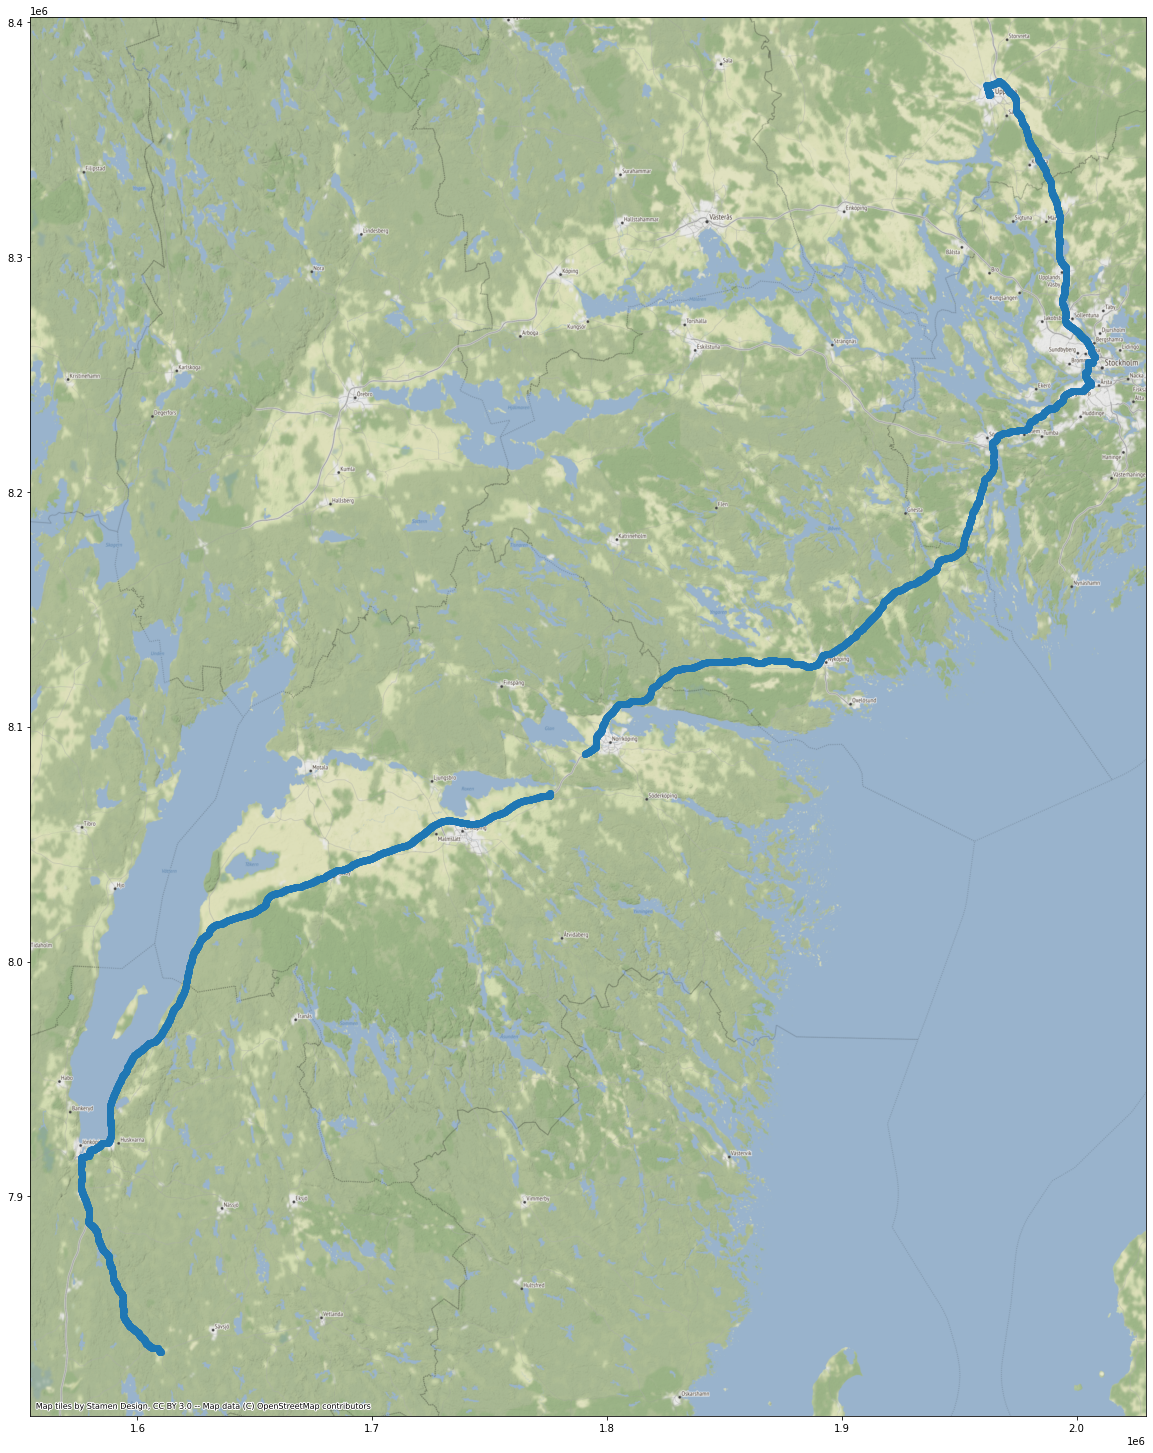

In [262]:
good_tracks = ['2019-05-20', '2019-06-09', '2019-06-26', '2019-08-06', '2020-11-27', 
               '2020-12-29', '2020-12-30' ,'2021-04-11',  '2020-12-11', ]


# for name, data in lst.items():
#     if name in good_tracks:
data = lst['2021-01-16'].iloc[:6500]
geometry = gpd.points_from_xy(data.lon, data.lat)
# print(geometry.length)
gpd_df = gpd.GeoDataFrame(data, geometry=geometry, crs=SOURCE_EPSG).reset_index()
ax = gpd_df.to_crs(WGS84_EPSG).plot(figsize=(20,30))
ctx.add_basemap(ax=ax, zoom=10)

In [ ]:

# from datetime import datetime, time

# t1 = datetime(2021, 1, 16, 4, 10)
# t2 = datetime(2021, 1, 16, 4, 25)
# bad = [datetime(2021, 1, 16, 4,21,49)]

# tmp = gpd_df.iloc[:6500][(gpd_df['timestamp'] > t1)&  ( gpd_df['timestamp'] < t2) ]
# ax = tmp.to_crs(WGS84_EPSG).plot(figsize=(20,30))
# ctx.add_basemap(ax=ax, zoom=12)

# # tmp[tmp['timestamp'] == datetime(2021, 1, 16, 4,21,49)]
# tmp

In [235]:
type(datetime(2021, 1, 16, 4,20,0)), type(gpd_df['timestamp'].iloc[0]), gpd_df['timestamp'].iloc[0]

(datetime.datetime,
 pandas._libs.tslibs.timestamps.Timestamp,
 Timestamp('2021-01-16 00:00:02'))

In [252]:
gpd_df

,index,lon,lat,timestamp,geometry
0,10303,14.461908,57.357824,2021-01-16 00:00:02,POINT (14.46191 57.35782)
1,10304,14.460953,57.358229,2021-01-16 00:00:07,POINT (14.46095 57.35823)
2,10305,14.459973,57.358868,2021-01-16 00:00:12,POINT (14.45997 57.35887)
3,10306,14.458961,57.359562,2021-01-16 00:00:17,POINT (14.45896 57.35956)
4,10307,14.457938,57.360261,2021-01-16 00:00:22,POINT (14.45794 57.36026)
...,...,...,...,...,...
7820,144828,17.630460,59.862432,2021-01-16 23:49:48,POINT (17.63046 59.86243)
7821,144829,17.630677,59.862467,2021-01-16 23:53:32,POINT (17.63068 59.86247)
7822,144830,17.630656,59.862442,2021-01-16 23:53:38,POINT (17.63066 59.86244)
7823,144831,17.630654,59.862519,2021-01-16 23:58:07,POINT (17.63065 59.86252)
